In [ ]:
# Animated Bar Chart Example

## Stock data

     year stock                 sector   avg_close    avg_volume    avg_open  \
86   2008    PG       Consumer Staples   66.138182  1.639911e+07   66.120751   
238  2013  MSFT             Technology   32.491468  4.862585e+07   32.441270   
301  2015   NKE      Consumer Cyclical   55.127024  7.584755e+06   55.153532   
350  2017    GE            Industrials   25.971394  4.583987e+07   26.018760   
168  2011   IBM             Technology  170.926111  5.759117e+06  170.731151   
323  2016   IBM             Technology  150.514921  4.033406e+06  150.342540   
315  2016   CAT            Industrials   78.698016  5.441235e+06   78.636032   
306  2015   UTX  Aerospace and Defense  107.136825  4.515503e+06  107.161468   
124  2010  AABA             Financials   15.585777  2.226781e+07   15.591195   
76   2008  INTC             Technology   19.960791  7.174616e+07   19.973874   

       avg_high     avg_low  
86    66.957905   65.322292  
238   32.733929   32.192024  
301   55.562262   54.648095  

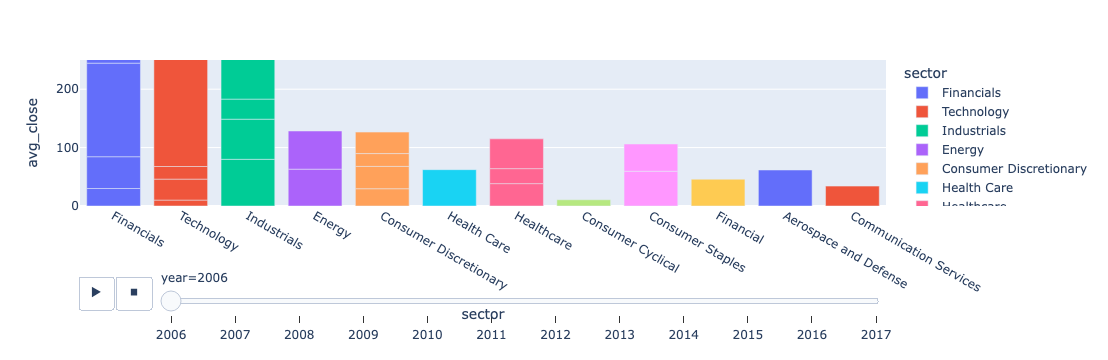

In [82]:
import plotly.express as px
import pandas as pd

# https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231

df_stocks = pd.read_csv('https://raw.githubusercontent.com/rebeccapeltz/data_repo/refs/heads/main/all_stocks_2006-01-01_to_2018-01-01.csv')
# df_stocks = pd.read_csv('https://raw.githubusercontent.com/rebeccapeltz/data_repo/refs/heads/main/all_stocks_2017-01-01_to_2018-01-01.csv')
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks['year'] = df_stocks['Date'].dt.year

# print(df_stocks.sample(10))
df_sectors = pd.read_csv('https://raw.githubusercontent.com/rebeccapeltz/data_repo/refs/heads/main/stocks_sector.csv')
# print(df_sectors.sample(31))
df_merged = pd.merge(df_stocks, df_sectors, left_on='Name', right_on='stock', how='left')
# print(df_merged.sample(10))

# df_grouped = df.groupby(['stock', 'sector', 'year'])[['price', 'volume']].mean().reset_index()

df_yearly = df_merged.groupby(['year','stock','sector'])[['Close', 'Volume','Open','High','Low']].mean().reset_index()

df_yearly.rename(columns={'Close': 'avg_close', 'Volume':'avg_volume', 'Open': 'avg_open','High': 'avg_high','Low':'avg_low'}, inplace=True)

print(df_yearly.sample(10))


fig = px.bar(df_yearly, x='sector', y='avg_close', color='sector',
  animation_frame="year", animation_group="stock", range_y=[0,250],
            hover_data=['stock'])
fig.update_layout(transition = {'duration': 2000})

fig.show()

